## Analysis ACF - PCF Time series 

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
#!pip install pmdarima --quiet
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
ari = pd.read_csv("data_ari.csv",sep=",",dtype={'location':str,'year_week':str,
                                                'value':np.float32,'relative_humidity_2m':np.float64,
                                                'temperature_2m_max':np.float64,'temperature_2m_min':np.float64},
                                                parse_dates=['truth_date'])
ari = ari.drop(columns=['Unnamed: 0']).reset_index(drop=True)
ari.tail()

,location,truth_date,year_week,value,relative_humidity_2m,temperature_2m_max,temperature_2m_min,covid
5261,RO,2024-10-13,2024-W41,917.299988,69.57961,22.888000,11.746333,0
5262,DE,2024-10-13,2024-W41,1913.000000,80.27663,16.115000,8.390000,0
5263,HU,2024-10-13,2024-W41,2191.800049,79.25637,19.500666,10.467334,0
5264,SI,2024-10-13,2024-W41,1748.699951,83.50453,18.756998,11.148666,0
5265,BE,2024-10-13,2024-W41,1384.099976,82.94098,14.331166,9.156167,0


In [3]:
ili = pd.read_csv("data_ili.csv",sep=",",dtype={'location':str,'year_week':str,
                                                'value':np.float32,'relative_humidity_2m':np.float64,
                                                'temperature_2m_max':np.float64,'temperature_2m_min':np.float64},
                                                parse_dates=['truth_date'])
ili = ili.drop(columns=['Unnamed: 0']).reset_index(drop=True)
ili.tail()

,location,truth_date,year_week,value,relative_humidity_2m,temperature_2m_max,temperature_2m_min,covid
8341,BE,2024-10-13,2024-W41,240.500000,82.940980,14.331166,9.156167,0
8342,NO,2024-10-13,2024-W41,20.600000,92.238790,10.406834,4.981833,0
8343,DK,2024-10-13,2024-W41,154.100006,81.480760,13.292500,9.684167,0
8344,MT,2024-10-13,2024-W41,4600.000000,66.957344,27.473833,21.515501,0
8345,AT,2024-10-13,2024-W41,3214.199951,82.496320,13.673167,4.914833,0


In [4]:
# Group the data by country
countries_ari = ['BE', 'BG', 'CZ', 'EE', 'FR', 'DE', 'HU', 'LT', 'RO',
       'SI', 'ES','LV']
countries_ari2 = ['LU']

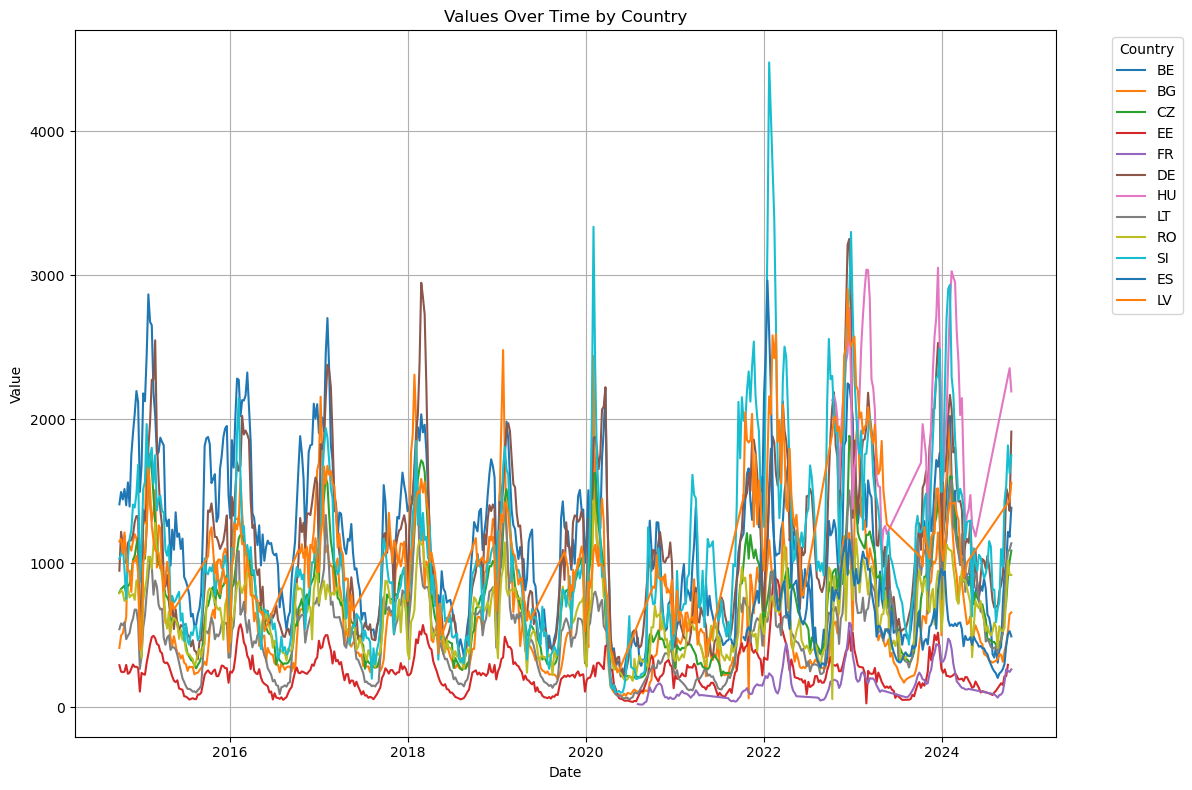

In [5]:
# Plot data for each country
plt.figure(figsize=(12, 8))
for country in countries_ari:
    country_data = ari[ari['value']<6000]
    country_data = country_data[country_data['location'] == country]
    plt.plot(country_data['truth_date'], country_data['value'], label=country)

# Customize the plot
plt.title('Values Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

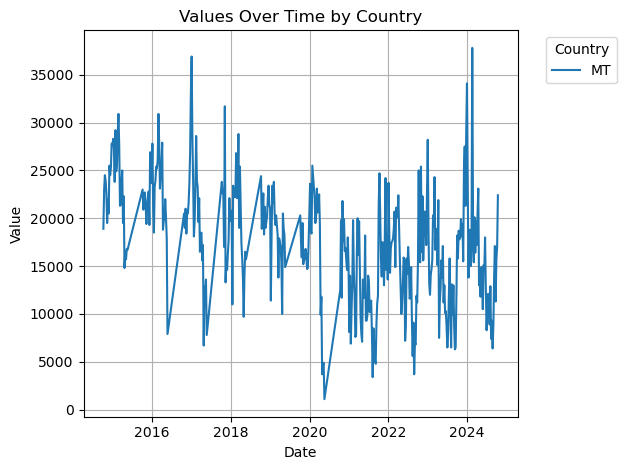

In [15]:
country_data = ari[ari['location'] == "LU"]
plt.plot(country_data['truth_date'], country_data['value'], label=country)

# Customize the plot
plt.title('Values Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
ari[ari['value']>50000]

,location,truth_date,year_week,value,relative_humidity_2m,temperature_2m_max,temperature_2m_min,covid
4997,LV,2024-04-21,2024-W16,100000.0,77.38517,6.335000,0.120714,1
5004,LV,2024-04-28,2024-W17,100000.0,78.77570,12.949286,2.792143,1
5020,LV,2024-05-05,2024-W18,100000.0,66.32311,17.177856,8.099286,1
5029,LV,2024-05-12,2024-W19,100000.0,71.71208,10.342143,4.570714,1
5039,LV,2024-05-19,2024-W20,100000.0,69.08984,21.149286,8.899286,1


In [8]:
aux_ili = ['SI', 'DK', 'EE', 'PL', 'FR', 'AT', 'HR', 'RO', 'GR', 'HU', 'IE',
       'LV', 'BE', 'LT', 'NL', 'CZ', 'NO']

country_ili_2 = ['LU','MT']

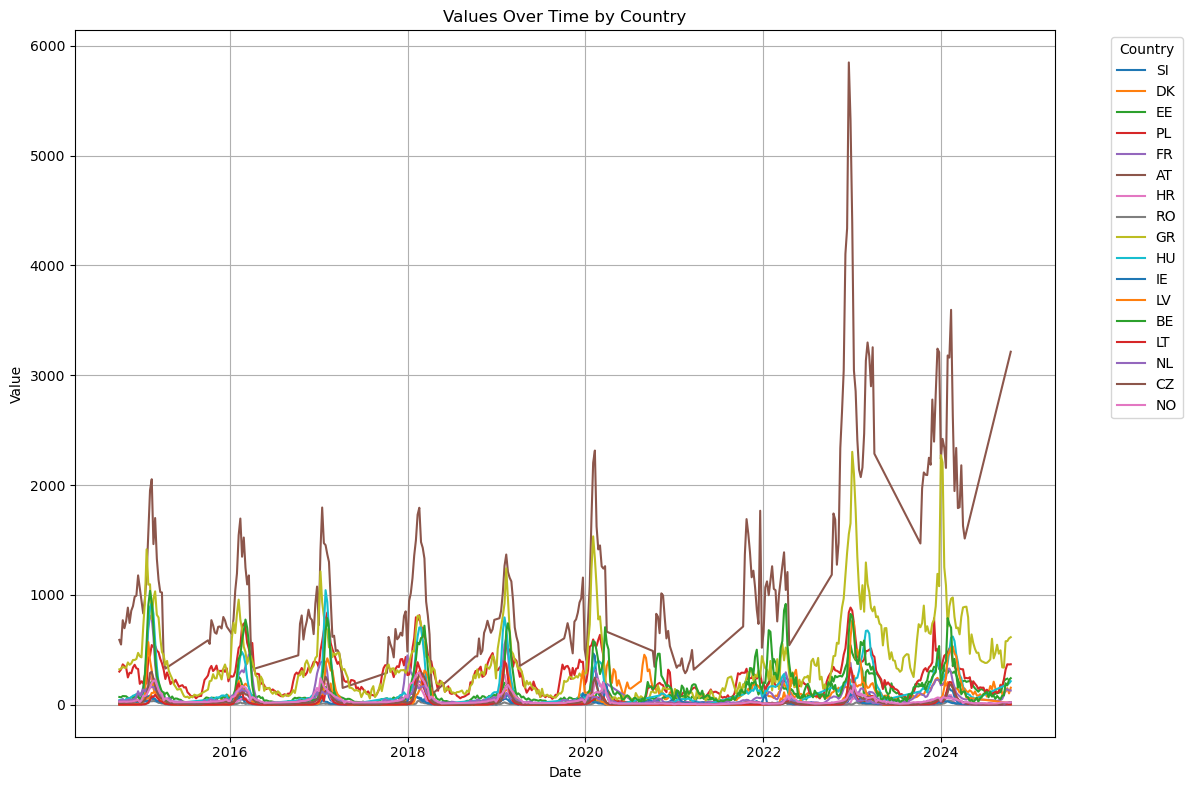

In [9]:
# Plot data for each country
plt.figure(figsize=(12, 8))
for country in aux_ili:
    country_data = ili[ili['value']<50000]
    country_data = country_data[country_data['location'] == country]
    plt.plot(country_data['truth_date'], country_data['value'], label=country)

# Customize the plot
plt.title('Values Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

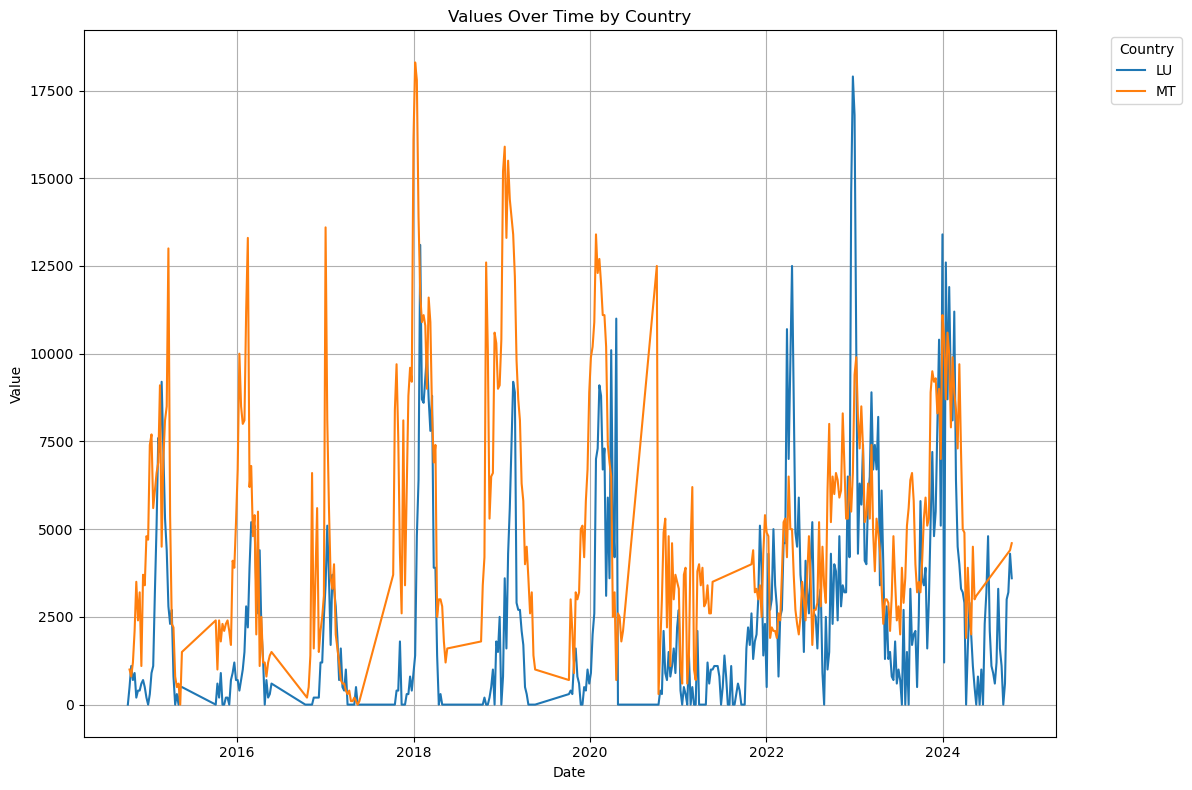

In [10]:
# Plot data for each country
plt.figure(figsize=(12, 8))
for country in country_ili_2:
    country_data = ili[ili['value']<50000]
    country_data = country_data[country_data['location'] == country]
    plt.plot(country_data['truth_date'], country_data['value'], label=country)

# Customize the plot
plt.title('Values Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
def stat_check(data,country):
    dat = data[data['location']==country]
    adf_test = adfuller(dat['value'])
    print(f'p-value: %f for {country}' % adf_test[1])


In [ ]:
for i in aux_ili:
    stat_check(ili,i)

In [ ]:
for i in country_ili_2:
    stat_check(ili,i)

In [ ]:
for i in countries_ari:
    stat_check(ari,i)

In [ ]:
for i in countries_ari2:
    stat_check(ari,i)

In [ ]:
for country in countries_ari:
    country_data = ari[ari['location'] == country]['value']
    
    # Create a figure for the plots
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"ACF and PACF for {country}", fontsize=16)
    
    # Plot ACF
    plt.subplot(1, 2, 1)
    plot_acf(country_data, lags=104, ax=plt.gca())
    plt.title("ACF")
    
    # Plot PACF
    plt.subplot(1, 2, 2)
    plot_pacf(country_data, lags=104, ax=plt.gca(), method='ywm')
    plt.title("PACF")
    
    # Show the plots for the current country
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
for country in countries_ari2:
    country_data = ari[ari['location'] == country]['value']
    
    # Create a figure for the plots
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"ACF and PACF for {country}", fontsize=16)
    
    # Plot ACF
    plt.subplot(1, 2, 1)
    plot_acf(country_data, lags=104, ax=plt.gca())
    plt.title("ACF")
    
    # Plot PACF
    plt.subplot(1, 2, 2)
    plot_pacf(country_data, lags=104, ax=plt.gca(), method='ywm')
    plt.title("PACF")
    
    # Show the plots for the current country
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
for country in aux_ili:
    country_data = ili[ili['location'] == country]['value']
    
    # Create a figure for the plots
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"ACF and PACF for {country}", fontsize=16)
    
    # Plot ACF
    plt.subplot(1, 2, 1)
    plot_acf(country_data, lags=104, ax=plt.gca())
    plt.title("ACF")
    
    # Plot PACF
    plt.subplot(1, 2, 2)
    plot_pacf(country_data, lags=104, ax=plt.gca(), method='ywm')
    plt.title("PACF")
    
    # Show the plots for the current country
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
for country in country_ili_2:
    country_data = ili[ili['location'] == country]['value']
    
    # Create a figure for the plots
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"ACF and PACF for {country}", fontsize=16)
    
    # Plot ACF
    plt.subplot(1, 2, 1)
    plot_acf(country_data, lags=104, ax=plt.gca())
    plt.title("ACF")
    
    # Plot PACF
    plt.subplot(1, 2, 2)
    plot_pacf(country_data, lags=104, ax=plt.gca(), method='ywm')
    plt.title("PACF")
    
    # Show the plots for the current country
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()